# Titanic_Classification

## importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## importing required dataset

In [ ]:
import os 
os.getcwd()

'C:\\Users\\ganga\\OneDrive\\Desktop\\project'

In [57]:
os.chdir('C:\\Users\\ganga\\OneDrive\\Desktop\\project\\')
os.getcwd()

'C:\\Users\\ganga\\OneDrive\\Desktop\\project'

In [58]:
df = pd.read_csv('Titanic-Dataset.csv', encoding='ISO-8859-1')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
df.shape

(891, 12)

In [60]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [61]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### DROPPING COLUMNS WITH NULL VALUES

In [121]:
df.drop(columns=['Age', 'Cabin'])

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",1,0,0,111369,30.0000,C


In [105]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


## VISUALIZATION

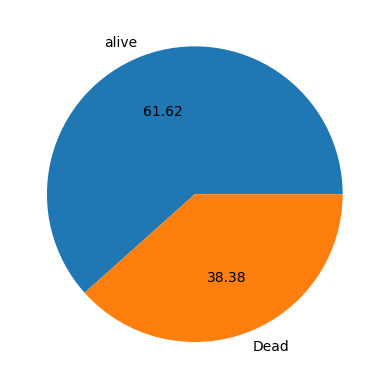

In [116]:
import matplotlib.pyplot as plt
plt.pie(df['Survived'].value_counts(), labels=['alive','Dead'],autopct="%0.2f")
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

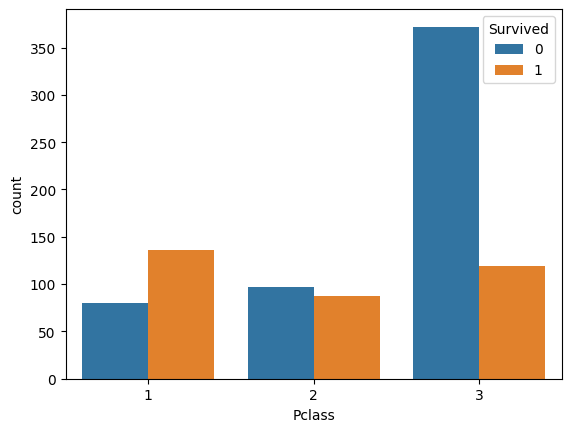

In [134]:
sns.countplot(x='Pclass',hue='Survived',data=df)

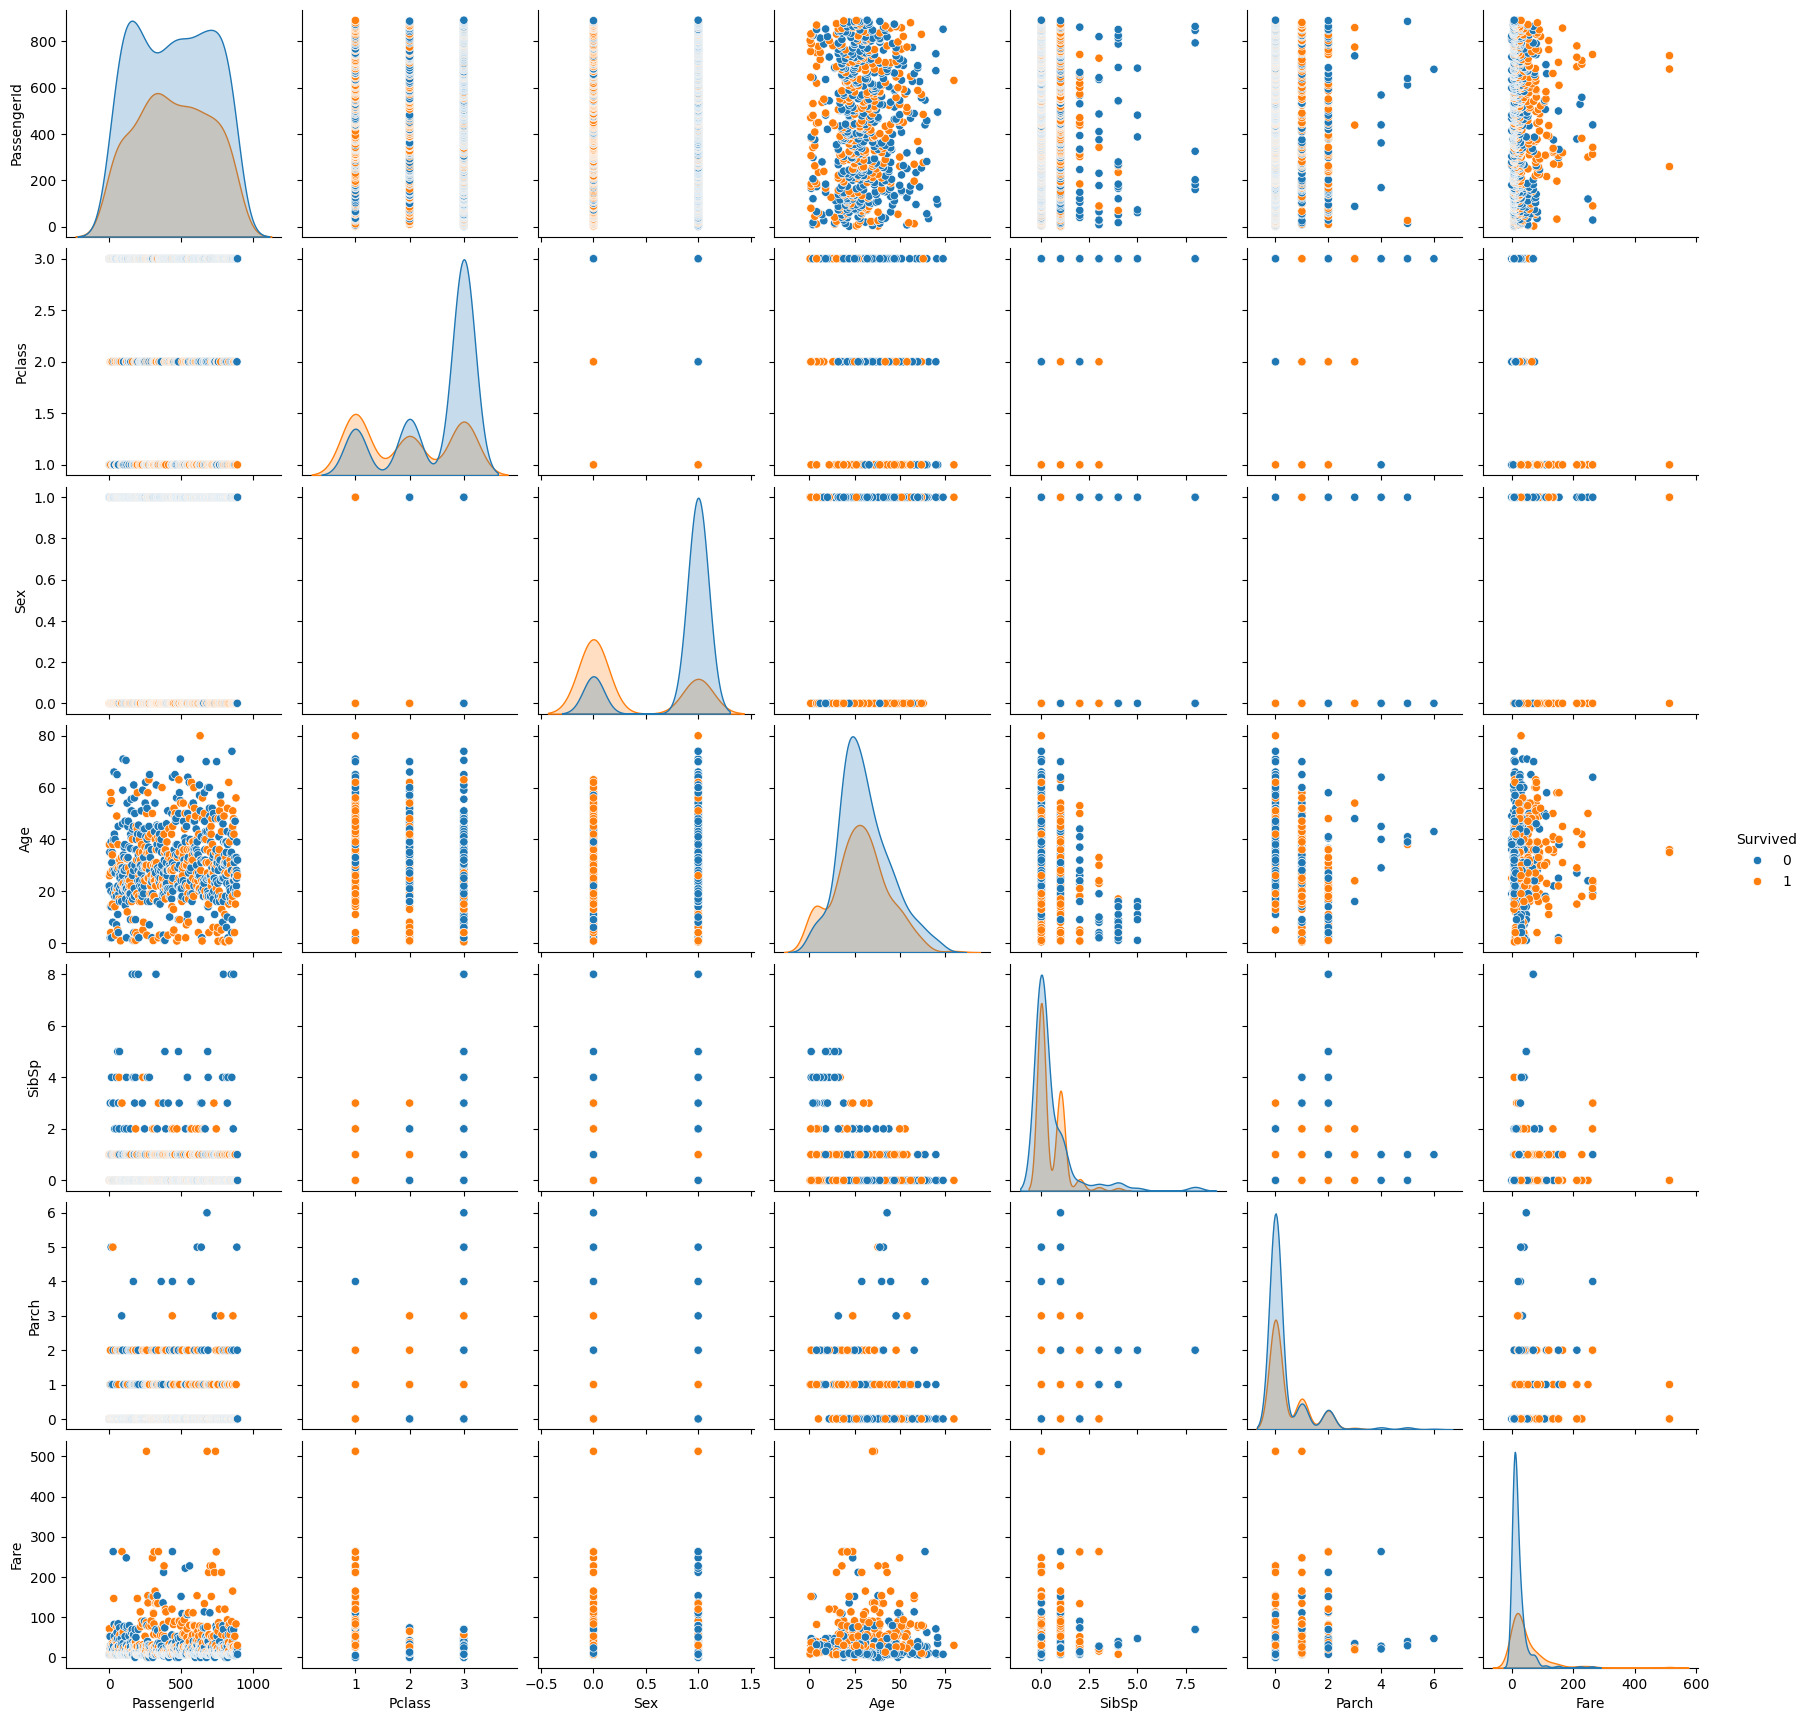

In [135]:
sns.pairplot(df,hue='Survived')


<Axes: ylabel='Count'>

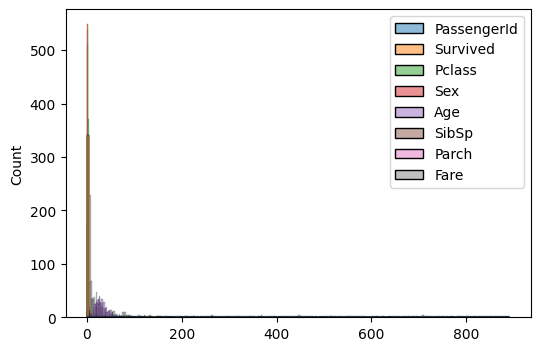

In [130]:
plt.figure(figsize=(6,4))
sns.histplot(df[df['Survived'] == 0])
sns.histplot(df[df['Survived'] == 1])

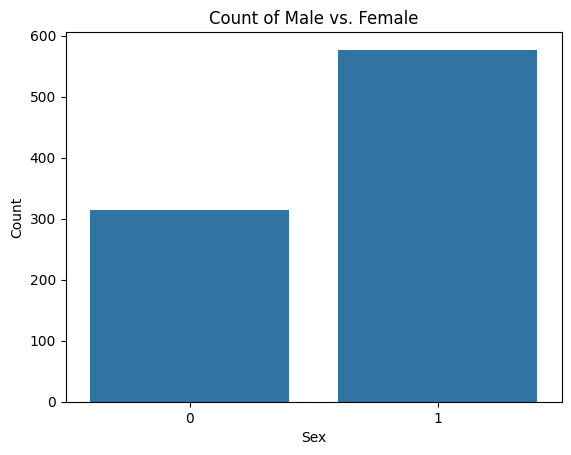

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Male vs. Female')
plt.show()


##### LABEL ENCODING THE COLUMN SEX

In [67]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
print(df['Sex'])

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32


## MODEL BUILDING

In [71]:
from sklearn.model_selection import train_test_split

In [122]:
X=df[['Pclass','Sex']]
y=df['Survived']

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [124]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [92]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0) 


### SELECTING THE BEST PREDICTION MODEL BASED ON THE HIGHEST ACCURACY SCORE

C:\Users\ganga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best Algorithm: KNeighborsClassifier
Accuracy: 0.771
Precision: 0.768
Confusion Matrix:
[[77 23]
 [18 61]]


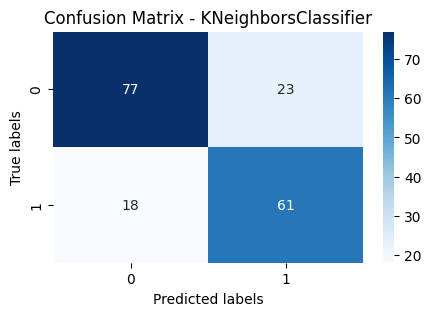



Results for all algorithms in descending order of accuracy:

Algorithm: KNeighborsClassifier
Accuracy: 0.771
Precision: 0.768
Confusion Matrix:
[[77 23]
 [18 61]]


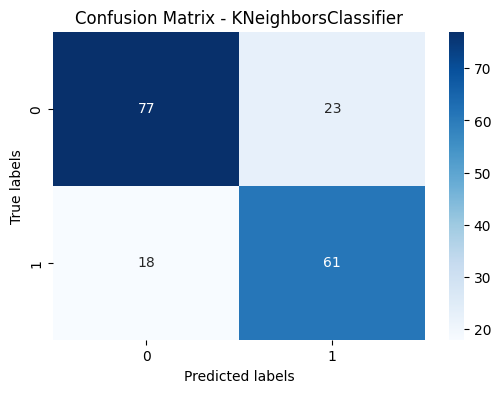

----------------------------------------
Algorithm: LogisticRegression
Accuracy: 0.765
Precision: 0.775
Confusion Matrix:
[[88 12]
 [30 49]]


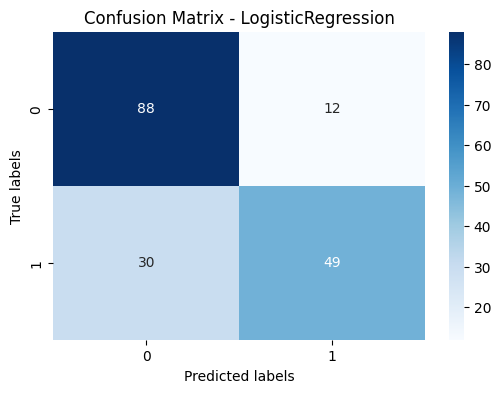

----------------------------------------
Algorithm: AdaBoostClassifier
Accuracy: 0.765
Precision: 0.775
Confusion Matrix:
[[88 12]
 [30 49]]


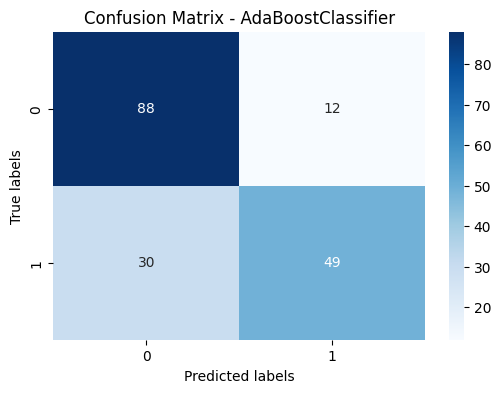

----------------------------------------
Algorithm: SVC
Accuracy: 0.749
Precision: 0.760
Confusion Matrix:
[[88 12]
 [33 46]]


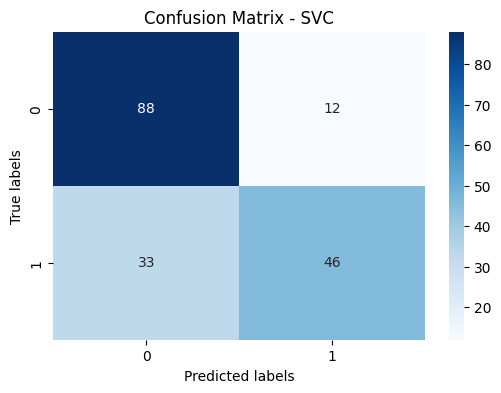

----------------------------------------
Algorithm: DecisionTreeClassifier
Accuracy: 0.743
Precision: 0.829
Confusion Matrix:
[[99  1]
 [45 34]]


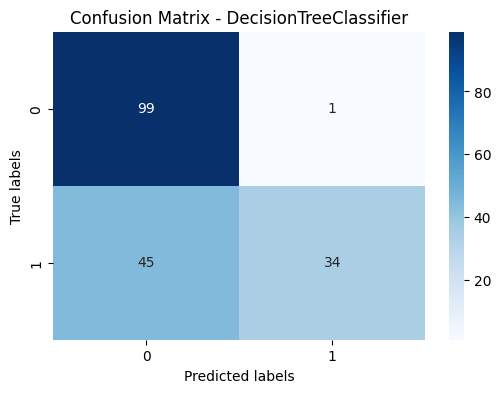

----------------------------------------
Algorithm: RandomForestClassifier
Accuracy: 0.743
Precision: 0.829
Confusion Matrix:
[[99  1]
 [45 34]]


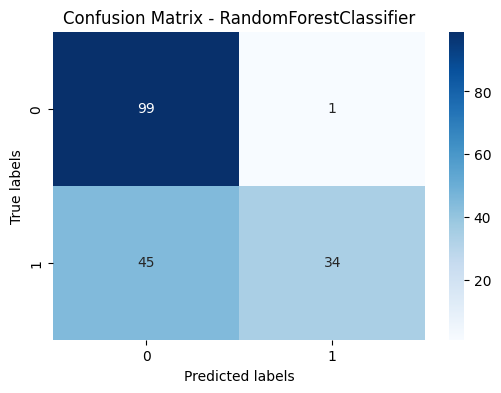

----------------------------------------
Algorithm: BaggingClassifier
Accuracy: 0.743
Precision: 0.829
Confusion Matrix:
[[99  1]
 [45 34]]


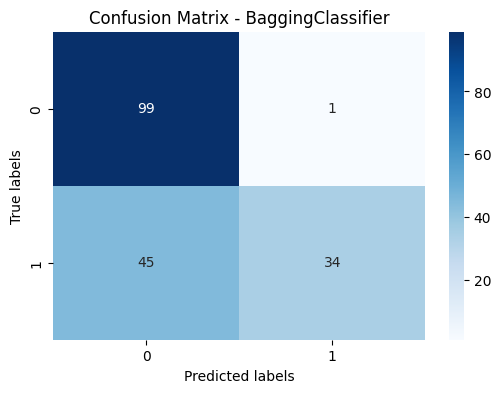

----------------------------------------
Algorithm: ExtraTreesClassifier
Accuracy: 0.743
Precision: 0.829
Confusion Matrix:
[[99  1]
 [45 34]]


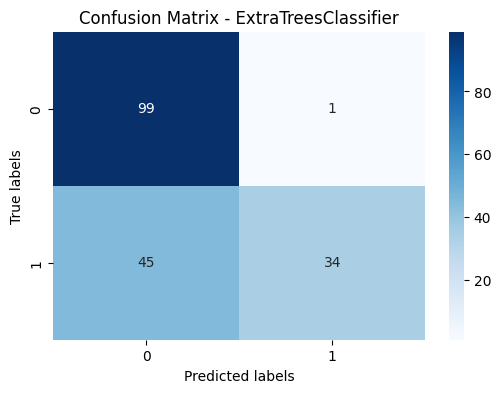

----------------------------------------
Algorithm: GradientBoostingClassifier
Accuracy: 0.743
Precision: 0.829
Confusion Matrix:
[[99  1]
 [45 34]]


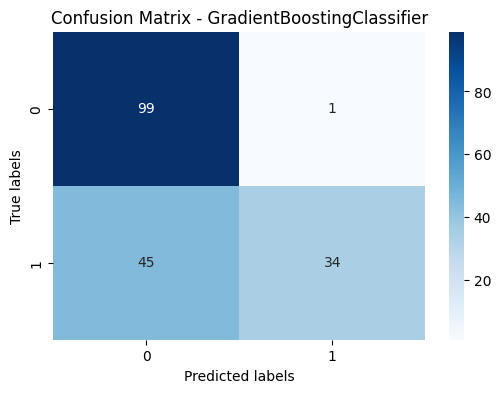

----------------------------------------
Algorithm: XGBClassifier
Accuracy: 0.743
Precision: 0.829
Confusion Matrix:
[[99  1]
 [45 34]]


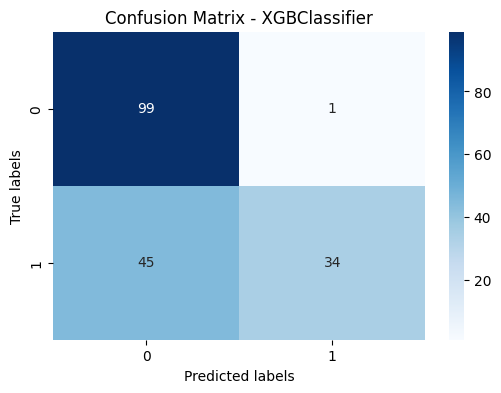

----------------------------------------
Algorithm: MultinomialNB
Accuracy: 0.559
Precision: 0.279
Confusion Matrix:
[[100   0]
 [ 79   0]]


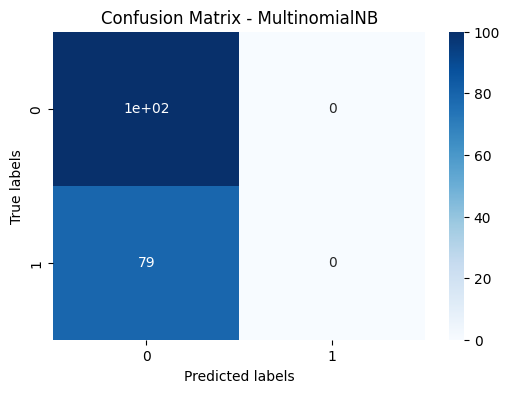

----------------------------------------


In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Define algorithms
algorithms = [
    LogisticRegression(solver='liblinear', penalty='l1'),
    SVC(kernel='sigmoid', gamma=1.0),
    MultinomialNB(),
    DecisionTreeClassifier(max_depth=5),
    KNeighborsClassifier(),
    RandomForestClassifier(n_estimators=50, random_state=2),
    AdaBoostClassifier(n_estimators=50, random_state=2),
    BaggingClassifier(n_estimators=50, random_state=2),
    ExtraTreesClassifier(n_estimators=50, random_state=2),
    GradientBoostingClassifier(n_estimators=50, random_state=2),
    XGBClassifier(n_estimators=50, random_state=2)
]

# Initialize variables to track the best algorithm
best_algo = None
best_accuracy = 0
best_precision = 0
best_cm = None

# Evaluate each algorithm and store the results
results = []

for algo in algorithms:
    algo.fit(X_train, y_train)
    y_pred = algo.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)

    results.append((algo.__class__.__name__, accuracy, precision, cm))

    # Check if this algorithm has the highest accuracy
    if accuracy > best_accuracy:
        best_algo = algo
        best_accuracy = accuracy
        best_precision = precision
        best_cm = cm

# Sort results by accuracy in descending order
results.sort(key=lambda x: x[1], reverse=True)

# Print and visualize the best algorithm's results
if best_algo is not None:
    print(f"Best Algorithm: {best_algo.__class__.__name__}")
    print(f"Accuracy: {best_accuracy:.3f}")
    print(f"Precision: {best_precision:.3f}")
    print(f"Confusion Matrix:\n{best_cm}")
    
    plt.figure(figsize=(5,3))
    sns.heatmap(best_cm, annot=True, cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {best_algo.__class__.__name__}')
    plt.show()

# Print and visualize all algorithms' results in descending order of accuracy
print("\n\nResults for all algorithms in descending order of accuracy:\n")
for algo_name, accuracy, precision, cm in results:
    print(f"Algorithm: {algo_name}")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Confusion Matrix:\n{cm}")

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues')  # Change the color map here
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {algo_name}')
    plt.show()

    print("----------------------------------------")


## * KNeighborsClassifier* is the best prediction algorithm with highest accuracy score .

## making pickle file for the prediction ALGO KNeighborsClassifier

In [98]:
import pickle
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn_model, f)


## prediction function

In [136]:
import pickle

def load_model(model_file):
    with open(model_file, 'rb') as f:
        model = pickle.load(f)
    return model

def predict_survival(model, sex, pclass):
    input_features = [[sex, pclass]]
    prediction = model.predict(input_features)
    return prediction

def main():
    knn_model = load_model('knn_model.pkl')
    sex = input("Enter the sex (1 for male, 0 for female): ")
    pclass = input("Enter the passenger class (1 for 1st class, 2 for 2nd class, 3 for 3rd class): ")
    sex = int(sex)
    pclass = int(pclass)
    prediction = predict_survival(knn_model, sex, pclass)
    if prediction[0] == 1:
        print("Prediction: Survived")
    else:
        print("Prediction: Did not survive")

if __name__ == "__main__":
    main()


Enter the sex (1 for male, 0 for female):  1
Enter the passenger class (1 for 1st class, 2 for 2nd class, 3 for 3rd class):  3


Prediction: Survived


C:\Users\ganga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
